# MULTICLASS CLASSIFICATION 



In [ ]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(8000, 28, 28)
(8000,)
(2000, 28, 28)
(2000,)


In [ ]:
#print the unique values in Y_train
print(np.unique(Y_train))


[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#Additional code block created by me for the label required in the next code block
Description = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker', 'Bag', 'Ankle boot']

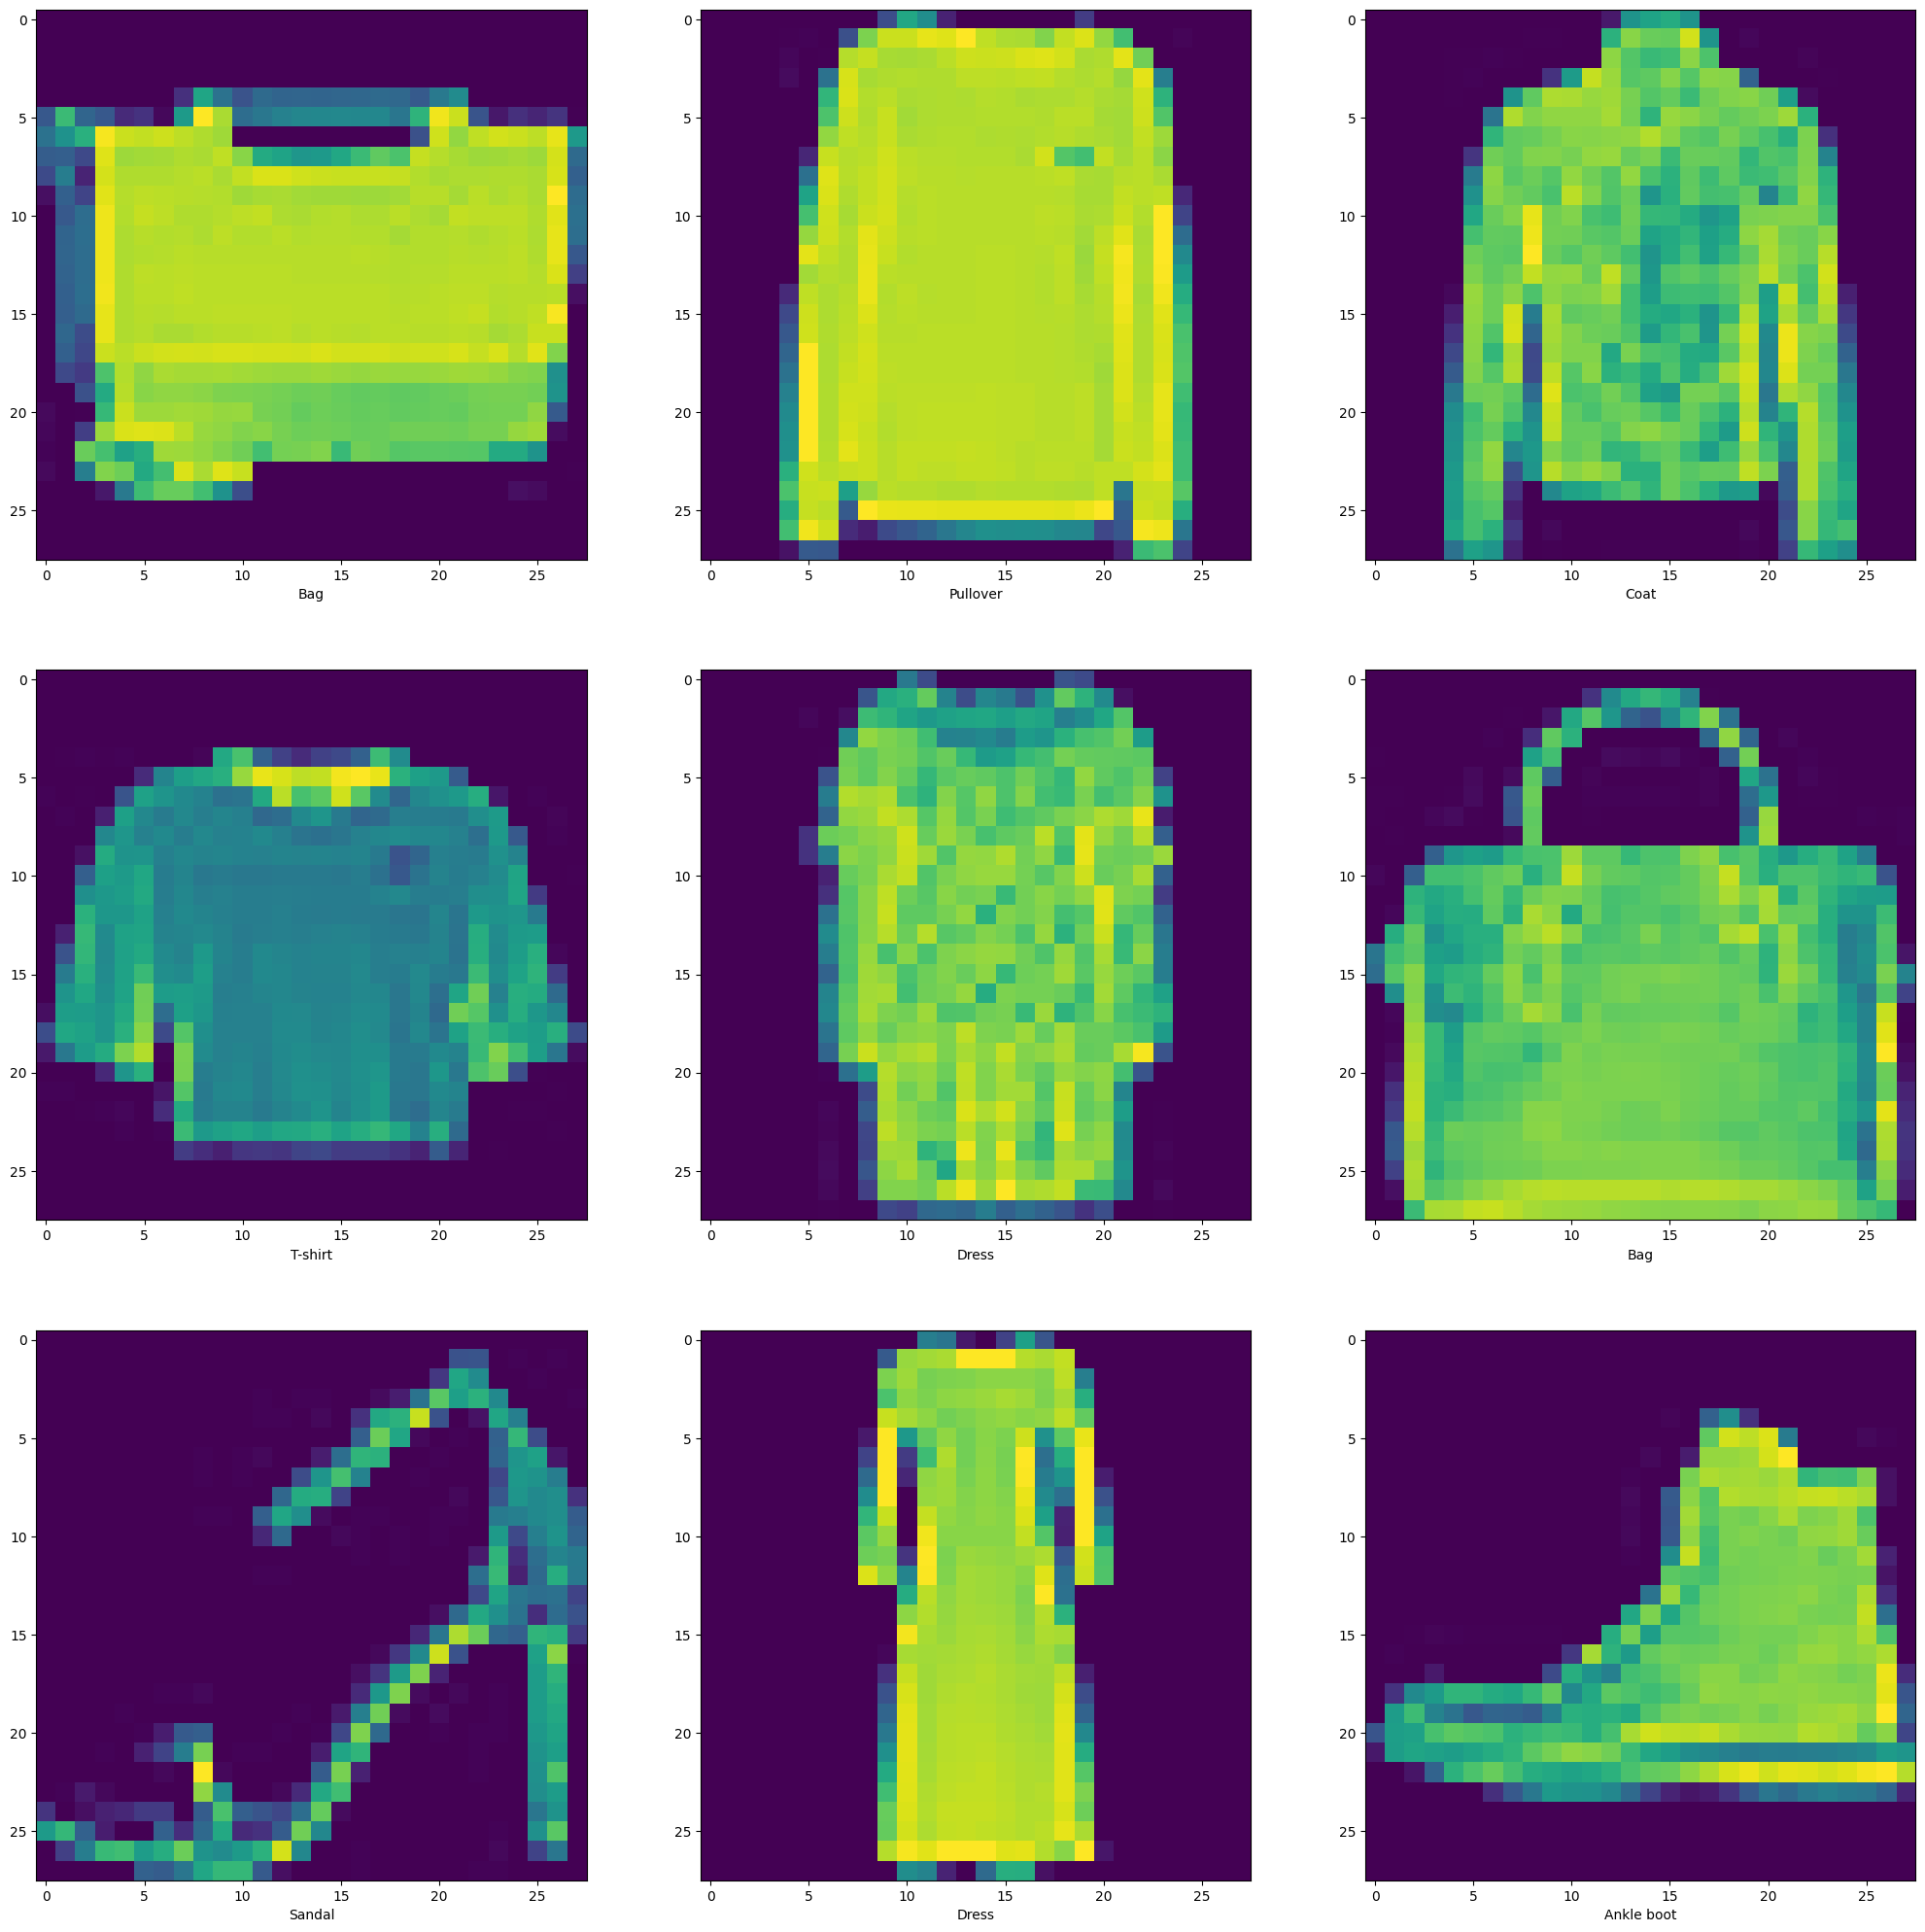

In [ ]:
#randomly print 9 images with label
#edit the 2 lines of the code snippet

import random
figure = plt.figure(figsize=(25,25))
for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  #edit1__plot_image_here_
  plt.imshow(X_train[index])
  #edit2__add_label_here_
  plt.xlabel(Description[Y_train[index]])

  
  


###These number denotes the respective object
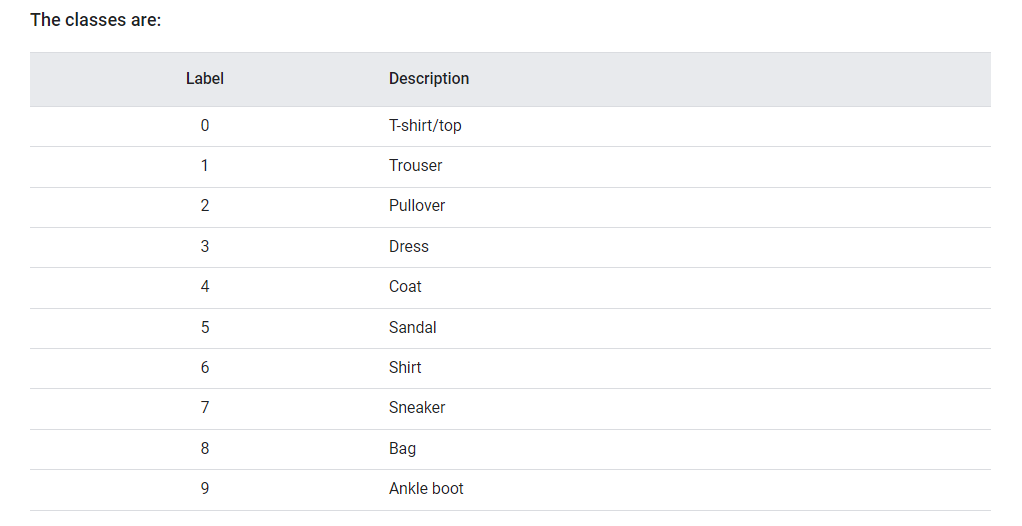

In [ ]:
# Find the count of each type of class
unique_values, counts = np.unique(Y_train, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")


0: 794
1: 802
2: 820
3: 807
4: 802
5: 803
6: 783
7: 789
8: 794
9: 806


In [ ]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))


#__add__ additional Intermediate Dense layers here to create the output
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))


#__output__layer with correct output shape and activation function[ google if finding this difficult to get]
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))


In [ ]:
# Compiling the model
#add the lr and loss in the given space

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics=['accuracy'])

In [ ]:
#Lets analyse the model
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 128)               100480    
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


###What is the number of trainable parameters in the model?

In [ ]:
""" 
[objective] Write the answer here: 111,146
"""

' \n[objective] Write the answer here: 111,146\n'

In [ ]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train,Y_train, validation_split=0.2, epochs = 10)

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2472 - accuracy: 0.9078 - val_loss: 0.7547 - val_accuracy: 0.8156
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2485 - accuracy: 0.9073 - val_loss: 0.8096 - val_accuracy: 0.8181
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2383 - accuracy: 0.9109 - val_loss: 0.8106 - val_accuracy: 0.8163
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2360 - accuracy: 0.9130 - val_loss: 0.8271 - val_accuracy: 0.8087
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2308 - accuracy: 0.9162 - val_loss: 0.8567 - val_accuracy: 0.8106
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.2283 - accuracy: 0.9145 - val_loss: 0.8205 - val_accuracy: 0.8169
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2235 - accuracy: 0.9175 - val_loss: 0.8562 - val_accuracy: 0.8062
Epoch 

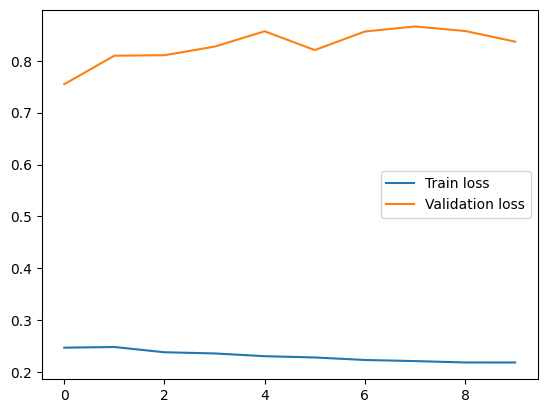

In [ ]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()

###What do you infer from the graph of losses above?

In [ ]:
"""
[Under 100 words] Write your answer here: 
During the time of training, model gets trained by the X_train's 80% of the data. The model memorizes the details of the training set to such an extent
that it negatively impacts the model's performance on validation set which is known as overfitting. Here, due to overfitting the loss is high on the
validation data as compared to training data.


"""

"\n[Under 100 words] Write your answer here: \nDuring the time of training, model gets trained by the X_train's 80% of the data. The model memorizes the details of the training set to such an extent\nthat it negatively impacts the model's performance on validation set which is known as overfitting. Here, due to overfitting the loss is high on the\nvalidation data as compared to training data.\n\n\n"

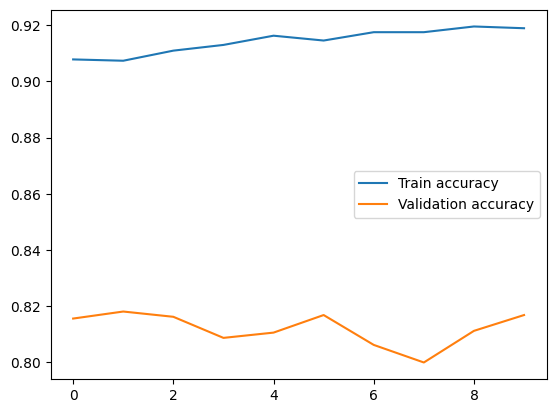

In [ ]:
#plotting the accuracy of the traing

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

###What do you infer from the graph of accuracies above?

In [ ]:
"""
[Under 100 words] Write your answer here: 
The answer is more or less same as that of the loss part i.e. due to overfitting the accuracy is low in the testing data i.e.
validation data as compared to training data.

"""

'\n[Under 100 words] Write your answer here: \nThe answer is more or less same as that of the loss part i.e. due to overfitting the accuracy is low in the testing data i.e.\nvalidation data as compared to training data.\n\n'

In [ ]:
#Checking the prediction

Y_predicted = model.predict(X_test)
Y_pred = np.argmax(Y_predicted, axis = 1)

63/63 [==============================] - 0s 2ms/step


In [ ]:
# Calculate the R2score for the test data
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)


0.7189013068908761

In [ ]:
# Let's see the kernel(weights) of the layers
model.layers[1].kernel.shape

TensorShape([784, 128])

In [ ]:
# print the shape of kernel of other layers as well
print(model.layers[2].kernel.shape)
print(model.layers[3].kernel.shape)
print(model.layers[4].kernel.shape)

(128, 64)
(64, 32)
(32, 10)


In [ ]:
# Does that satisfied the matrix multiplication math discussed earlier

Yes, it satisfies the matrix multiplication because it is np.dot(layer,kernel) so since the dimension of the input layer after flattening is (784,) which is a 1x784 matrix so when it gets multiplied with a kernel of shape 784x128 it will result in the next dense layer of shape 1x128 which in python is represented as (128,) and the explanation is similar for the other layers. Hence justified.